# Data 

The Pima Indians dataset is about the prediction of diabetes . This is a small dataset available from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes

**Attribute Information:**

1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 or 1) (diabetes mellitus)

In [1]:
# Download the data
! wget -O pima-indians-diabetes.csv https://gist.githubusercontent.com/ktisha/c21e73a1bd1700294ef790c56c8aec1f/raw/819b69b5736821ccee93d05b51de0510bea00294/pima-indians-diabetes.csv

--2019-06-10 13:58:27--  https://gist.githubusercontent.com/ktisha/c21e73a1bd1700294ef790c56c8aec1f/raw/819b69b5736821ccee93d05b51de0510bea00294/pima-indians-diabetes.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 151.101.36.133
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|151.101.36.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23628 (23K) [text/plain]
Saving to: 'pima-indians-diabetes.csv'

pima-indians-diabet 100%[===================>]  23.07K  --.-KB/s    in 0.02s   

2019-06-10 13:58:27 (1.22 MB/s) - 'pima-indians-diabetes.csv' saved [23628/23628]



In [2]:
# check if the data is downloaded
%ls -l

total 704
-rwxr-xr-x@ 1 sgupta  staff  12025 Jun  6 06:29 1 Timing Algorithms.ipynb*
-rwxr-xr-x@ 1 sgupta  staff  24900 Jun  6 06:29 10 MongoDB-Todo.ipynb*
-rwxr-xr-x@ 1 sgupta  staff   8445 Jun 10 14:00 12_Pima_Indians_Diabetes_TODO.ipynb*
-rwxr-xr-x@ 1 sgupta  staff   7094 Jun  6 06:29 2 Finding values in collections Solution.ipynb*
-rwxr-xr-x@ 1 sgupta  staff   5800 Jun  6 06:29 2 Finding values in collections Todo.ipynb*
-rwxr-xr-x@ 1 sgupta  staff  68221 Jun  6 06:29 3 Time Complexity-Solution.ipynb*
-rwxr-xr-x@ 1 sgupta  staff  30348 Jun  6 06:29 3 Time Complexity.ipynb*
-rwxr-xr-x@ 1 sgupta  staff  19962 Jun  6 06:29 4 Decision Trees Solution.ipynb*
-rwxr-xr-x@ 1 sgupta  staff   3844 Jun  6 06:29 4 Decision Trees Todo.ipynb*
-rwxr-xr-x@ 1 sgupta  staff  16729 Jun  6 06:29 5 Programming Paradigms.ipynb*
-rwxr-xr-x@ 1 sgupta  staff   4608 Jun  6 06:29 6 Linked-List-Todo.ipynb*
-rwxr-xr-x@ 1 sgupta  staff   3596 Jun  6 06:29 7 Binary Search Tree-Todo.ipynb*
-rwxr-xr-x@ 1 sgupta  st

In [3]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np

Using TensorFlow backend.


In [4]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [5]:
# load pima indians dataset
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")

In [13]:
# split dataset into input (X) and output (Y) variables
# output is the last column
X = dataset[:,:-1]
y = dataset[:,-1]

In [14]:
# print the shape of x
#
# TODO
X.shape

(768, 8)

In [15]:
# save to number of input dimensions in input_dim
input_dim = X.shape[1]
input_dim

8

In [16]:
# shape of y
# TODo
y.shape

(768,)

In [17]:
# Create training and test sets
# Test size should be 15%
# The test and train set should be stratified
# use a random state (for reproducability) of 42
# TODO
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42, stratify = y)

In [18]:
# shape of X_test
# TODO
X_test.shape

(116, 8)

# Model

In [20]:
# 1. Create Sequential model
# 2. + 3. Add two hidden dense layers with 12 and 8 nodes. Both should have Relu activations 
# 4. Add a final output layer
# Think about how many nodes the final output layer should have and what activation function is appropiate
# TODO
model = Sequential()
model.add(Dense(12, activation = 'relu', input_dim=input_dim))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [21]:
# Compile the model
# Think about what loss function is appropiate
# Use as the optimizer Adam
# Track as an additional metric Accuracy
# TODO
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [23]:
# Fit the model
model.fit(X_train, y_train, epochs = 300, batch_size = 10, validation_split = 0.15)
# Use 15% for Validation
# Train for 300 epochs
# User batch size = 10
# Save the model fitting into the variable history
# TODO
history = model.history

Instructions for updating:
Use tf.cast instead.
Train on 554 samples, validate on 98 samples
Epoch 1/300
554/554 [==============================] - 0s 813us/step - loss: 4.5575 - acc: 0.6173 - val_loss: 2.9822 - val_acc: 0.6531
Epoch 2/300
554/554 [==============================] - 0s 127us/step - loss: 1.7172 - acc: 0.5794 - val_loss: 1.0740 - val_acc: 0.6122
Epoch 3/300
554/554 [==============================] - 0s 131us/step - loss: 0.8462 - acc: 0.6065 - val_loss: 0.8166 - val_acc: 0.6735
Epoch 4/300
554/554 [==============================] - 0s 141us/step - loss: 0.7615 - acc: 0.6318 - val_loss: 0.7324 - val_acc: 0.6939
Epoch 5/300
554/554 [==============================] - 0s 134us/step - loss: 0.7083 - acc: 0.6588 - val_loss: 0.7580 - val_acc: 0.6735
Epoch 6/300
554/554 [==============================] - 0s 139us/step - loss: 0.7145 - acc: 0.6570 - val_loss: 0.6996 - val_acc: 0.6837
Epoch 7/300
554/554 [==============================] - 0s 177us/step - loss: 0.6811 - acc: 0.6823

554/554 [==============================] - 0s 118us/step - loss: 0.5522 - acc: 0.7112 - val_loss: 0.5788 - val_acc: 0.7245
Epoch 60/300
554/554 [==============================] - 0s 114us/step - loss: 0.5350 - acc: 0.7274 - val_loss: 0.5703 - val_acc: 0.7143
Epoch 61/300
554/554 [==============================] - 0s 111us/step - loss: 0.5211 - acc: 0.7473 - val_loss: 0.5643 - val_acc: 0.7245
Epoch 62/300
554/554 [==============================] - 0s 111us/step - loss: 0.5297 - acc: 0.7509 - val_loss: 0.5865 - val_acc: 0.7449
Epoch 63/300
554/554 [==============================] - 0s 110us/step - loss: 0.5276 - acc: 0.7365 - val_loss: 0.5663 - val_acc: 0.7143
Epoch 64/300
554/554 [==============================] - 0s 114us/step - loss: 0.5284 - acc: 0.7383 - val_loss: 0.5619 - val_acc: 0.7347
Epoch 65/300
554/554 [==============================] - 0s 129us/step - loss: 0.5458 - acc: 0.7274 - val_loss: 0.5831 - val_acc: 0.7245
Epoch 66/300
554/554 [==============================] - 0s 16

Epoch 119/300
554/554 [==============================] - 0s 125us/step - loss: 0.5070 - acc: 0.7491 - val_loss: 0.5394 - val_acc: 0.7143
Epoch 120/300
554/554 [==============================] - 0s 120us/step - loss: 0.4903 - acc: 0.7744 - val_loss: 0.5878 - val_acc: 0.7245
Epoch 121/300
554/554 [==============================] - 0s 127us/step - loss: 0.5202 - acc: 0.7491 - val_loss: 0.5556 - val_acc: 0.7449
Epoch 122/300
554/554 [==============================] - 0s 116us/step - loss: 0.4873 - acc: 0.7834 - val_loss: 0.5607 - val_acc: 0.7143
Epoch 123/300
554/554 [==============================] - 0s 111us/step - loss: 0.4846 - acc: 0.7780 - val_loss: 0.5383 - val_acc: 0.7245
Epoch 124/300
554/554 [==============================] - 0s 129us/step - loss: 0.4826 - acc: 0.7780 - val_loss: 0.5385 - val_acc: 0.7449
Epoch 125/300
554/554 [==============================] - 0s 119us/step - loss: 0.4849 - acc: 0.7780 - val_loss: 0.5637 - val_acc: 0.7245
Epoch 126/300
554/554 [==================

Epoch 179/300
554/554 [==============================] - 0s 121us/step - loss: 0.4516 - acc: 0.8069 - val_loss: 0.5651 - val_acc: 0.7143
Epoch 180/300
554/554 [==============================] - 0s 116us/step - loss: 0.4520 - acc: 0.7906 - val_loss: 0.5798 - val_acc: 0.6939
Epoch 181/300
554/554 [==============================] - 0s 117us/step - loss: 0.4528 - acc: 0.8014 - val_loss: 0.6036 - val_acc: 0.6837
Epoch 182/300
554/554 [==============================] - 0s 104us/step - loss: 0.4746 - acc: 0.7762 - val_loss: 0.5771 - val_acc: 0.6735
Epoch 183/300
554/554 [==============================] - 0s 109us/step - loss: 0.4513 - acc: 0.7924 - val_loss: 0.5632 - val_acc: 0.6939
Epoch 184/300
554/554 [==============================] - 0s 108us/step - loss: 0.4598 - acc: 0.7834 - val_loss: 0.5740 - val_acc: 0.7245
Epoch 185/300
554/554 [==============================] - 0s 95us/step - loss: 0.4563 - acc: 0.8014 - val_loss: 0.5626 - val_acc: 0.7245
Epoch 186/300
554/554 [===================

Epoch 239/300
554/554 [==============================] - 0s 120us/step - loss: 0.4279 - acc: 0.8105 - val_loss: 0.5704 - val_acc: 0.7143
Epoch 240/300
554/554 [==============================] - 0s 130us/step - loss: 0.4364 - acc: 0.7942 - val_loss: 0.5712 - val_acc: 0.7245
Epoch 241/300
554/554 [==============================] - 0s 144us/step - loss: 0.4495 - acc: 0.7906 - val_loss: 0.5713 - val_acc: 0.7347
Epoch 242/300
554/554 [==============================] - 0s 141us/step - loss: 0.4282 - acc: 0.8105 - val_loss: 0.6036 - val_acc: 0.7347
Epoch 243/300
554/554 [==============================] - 0s 144us/step - loss: 0.4338 - acc: 0.8159 - val_loss: 0.5809 - val_acc: 0.7245
Epoch 244/300
554/554 [==============================] - 0s 142us/step - loss: 0.4374 - acc: 0.8014 - val_loss: 0.6308 - val_acc: 0.6939
Epoch 245/300
554/554 [==============================] - 0s 138us/step - loss: 0.4444 - acc: 0.7870 - val_loss: 0.6724 - val_acc: 0.6939
Epoch 246/300
554/554 [==================

Epoch 299/300
554/554 [==============================] - 0s 104us/step - loss: 0.4190 - acc: 0.8123 - val_loss: 0.5915 - val_acc: 0.7245
Epoch 300/300
554/554 [==============================] - 0s 113us/step - loss: 0.4212 - acc: 0.8069 - val_loss: 0.5928 - val_acc: 0.7245


In [24]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


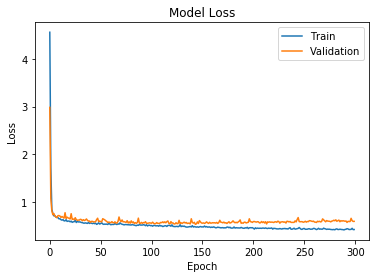

In [25]:
# Plot the History of Training Loss (history.history['loss']) and the Validation Loss (history.history['val_loss'])
# Title should be "Model Loss"
# x label: "Loss"
# y label: "Epoch"
# Legend: "Train" and "Validation"
# TODO
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

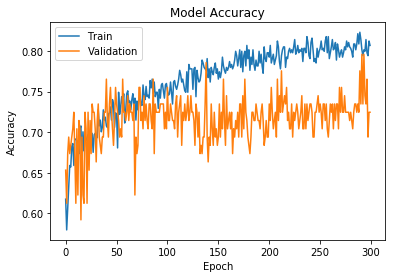

In [26]:
# Plot the History of Training Accuracy (history.history['acc']) and 
# the Validation Accuracy (history.history['val_acc'])
#
# Title should be "Model Accuracy"
# x label: "Accuracy"
# y label: "Epoch"
# Legend: "Train" and "Validation"
# TODO
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

In [27]:
# Evaluate the loss and accuracy on the test data
loss, accuracy = model.evaluate(X_test, y_test)

116/116 [==============================] - 0s 43us/step


In [28]:
print('Test score:', loss)
print('Test accuracy:', accuracy)

Test score: 0.6565924697908861
Test accuracy: 0.7068965537794705
